# Homework Real Estate


## Regression of real estate data
For this problem, you will analyze SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in 2015-16 in zip code 84103 (SLC avenues neighborhod [Google Map](https://www.google.com/maps/place/Salt+Lake+City,+UT+84103/@40.8030372,-111.8957957,12z/data=!3m1!4b1!4m5!3m4!1s0x87525f672006dded:0x311e638d9a1a2de5!8m2!3d40.810506!4d-111.8449346)). We are primarily interested in regressing the `SoldPrice` on the house attributes (property size, house size, number of bedrooms, etc...). 


### Task 1: Import the data 
Use the pandas.read_csv() function to import the dataset. The data is contained in two files: 'train1.csv' and 'train2.csv'. After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression. 

In [11]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [12]:
# your code goes here
train1=pd.read_csv('train1.csv')
train2=pd.read_csv('train2.csv')
train=pd.concat([train1,train2])

### Task 2: Clean the data 

1. There are 206 different variables associated with each of the 348 houses in this dataset. Skim them and try to get a rough understanding of what information this dataset contains. If you've never seen a real estate listing before, you might take a look at one on [this](http://www.utahrealestate.com/) website to get a better sense of the meanings of the column headers in the dataset.  

+ Only keep houses with List Price between 200,000 and 1,000,000 dollars. This is an arbitrary choice and we realize that some of you are high rollers, but for our purposes we'll consider the others as outliers. 

+ Remove columns that you don't think contribute to the value of the house. This is a personal decision - what attributes of a house are important to you? You should at least keep the following variables since the questions below will use them: ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt'] 

+ Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use [str.replace()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values as in Lecture 11. In particular, convert 'TotSqf' to an integer and add a column titled Prop_Type_num that is 
$$
\text{Prop_Type_num}_i = \begin{cases} 
0 & \text{if $i$-th listing is a condo or townhouse} \\
1 & \text{if $i$-th listing is a single family house}
\end{cases}. 
$$
+ Remove the listings with erroneous 'Longitude' (one has Longitude = 0) and 'Taxes' values (two have unreasonably large values).

In [13]:
# your code goes here
lp=train['LstPrice'] >199999
lp1=train['LstPrice'] <1000001
lp210=train[lp&lp1]
lp210

ListNo                              Access  AdditInfo  Acres  \
0    1397571                            Concrete        NaN   0.29   
1    1394021                             Asphalt        NaN   0.01   
2    1393604                                 NaN        NaN   0.11   
3    1393602                            Concrete        NaN   0.14   
5    1393370                             Asphalt        NaN   0.01   
6    1392721                            Concrete        NaN   0.14   
7    1392741     Asphalt; Circular; Common Drive        NaN   0.01   
9    1391580                            Concrete        NaN   0.09   
10   1391675              Common Drive; Concrete        NaN   0.01   
12   1391069                            Concrete        NaN   0.07   
13   1390589                            Concrete        NaN   0.09   
16   1388572                            Concrete        NaN   0.07   
17   1388576                                 NaN        NaN   0.09   
18   1388740                   Asphalt; Concrete        NaN   0.08   
19   1388159                             Asphalt        NaN   0.00   
22   1387695                            Concrete        NaN   0.11   
24   1386280                            Concrete        NaN   0.01   
25   1385862                            Concrete        NaN   0.17   
26   1386086              Common Drive; Concrete        NaN   0.06   
29   1385090  See Remarks; Asphalt; Common Drive        NaN   0.16   
31   1384273                            Concrete        NaN   0.07   
32   1384306                            Concrete        NaN   0.13   
33   1384366                            Concrete        NaN   0.26   
34   1384017                            Concrete        NaN   0.09   
35   1385470                   Asphalt; Concrete        NaN   0.00   
36   1383145                            Concrete        NaN   0.01   
37   1383272              Common Drive; Concrete        NaN   0.01   
38   1382955                                 NaN        NaN   0.16   
39   1403066                            Concrete        NaN   0.29   
40   1382766                            Concrete        NaN   0.11   
..       ...                                 ...        ...    ...   
102  1314354                             Asphalt        NaN   0.01   
103  1313618                            Circular        NaN   0.01   
106  1312185                            Concrete        NaN   0.59   
107  1311594                            Concrete        NaN   0.29   
108  1311639                            Concrete        NaN   0.13   
109  1311163                   Asphalt; Concrete        NaN   0.18   
110  1310280                                 NaN        NaN   0.10   
112  1309745                            Concrete        NaN   0.37   
113  1316382                            Concrete        NaN   0.34   
114  1308661                                 NaN        NaN   0.29   
117  1307809                             Asphalt        NaN   0.15   
118  1308047                            Concrete        NaN   0.08   
119  1307495                            Concrete        NaN   0.36   
122  1306326                            Concrete        NaN   0.45   
126  1303920                            Concrete        NaN   0.15   
127  1303363                            Concrete        NaN   0.01   
128  1303130                             Asphalt        NaN   0.08   
130  1300519                            Concrete        NaN   0.40   
131  1300620                             Asphalt        NaN   0.00   
134  1293274                  Circular; Concrete        NaN   0.01   
135  1289265              Common Drive; Concrete        NaN   0.00   
136  1288046                            Concrete        NaN   0.39   
137  1286790                            Concrete        NaN   0.01   
138  1285942                                 NaN        NaN   0.12   
142  1280794                                 NaN        NaN   0.15   
143  1277128    

### Task 3: Exploratory data analysis 

1. Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable. 

+ Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo). 

+ Compute the correlation matrix and use a heat map to visualize the correlation coefficients. 
    - Use a diverging color scale from -1 to +1 (see vmin and vmax parameters for [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html)
    - Show a legend
    - Make sure the proper labels are visible and readable (see [xticks](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html) and the corresponding [yticks](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yticks.html).

+ Make a scatter plot matrix to visualize the correlations. For the plot, only use a subset of the columns: ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']. Determine which columns have strong correlations. 

+ Describing your findings. 


In [14]:
# your code goes here
train.describe()

ListNo  AdditInfo       Acres   Area     BackDim    BsmntFin  \
count  3.480000e+02        0.0  348.000000  348.0  348.000000  348.000000   
mean   1.346385e+06        NaN    0.166236  101.0    0.517241   38.566092   
std    3.044341e+04        NaN    0.565366    0.0    4.905122   45.076415   
min    1.222911e+06        NaN    0.000000  101.0    0.000000    0.000000   
25%    1.323680e+06        NaN    0.010000  101.0    0.000000    0.000000   
50%    1.346396e+06        NaN    0.090000  101.0    0.000000    0.000000   
75%    1.372208e+06        NaN    0.160000  101.0    0.000000   95.000000   
max    1.403066e+06        NaN    9.670000  101.0   61.000000  100.000000   

         CompDays  CompSac    CrprtCap         DVR   ...     WinEle1  WinEle2  \
count  348.000000      0.0  348.000000  348.000000   ...       348.0    348.0   
mean     0.422414      NaN    0.198276    0.218391   ...         0.0      0.0   
std      0.494655      NaN    0.566396    0.413749   ...         0.0      0.0   
min      0.000000      NaN    0.000000    0.000000   ...         0.0      0.0   
25%      0.000000      NaN    0.000000    0.000000   ...         0.0      0.0   
50%      0.000000      NaN    0.000000    0.000000   ...         0.0      0.0   
75%      1.000000      NaN    0.000000    0.000000   ...         0.0      0.0   
max      1.000000      NaN    6.000000    1.000000   ...         0.0      0.0   

       WinEle3  WinEle4  WinEvp1  WinEvp2  WinEvp3  WinEvp4      YearBlt  \
count    348.0    348.0    348.0    348.0    348.0    348.0   348.000000   
mean       0.0      0.0      0.0      0.0      0.0      0.0  1945.770115   
std        0.0      0.0      0.0      0.0      0.0      0.0    34.963365   
min        0.0      0.0      0.0      0.0      0.0      0.0  1852.000000   
25%        0.0      0.0      0.0      0.0      0.0      0.0  1910.000000   
50%        0.0      0.0      0.0      0.0      0.0      0.0  1954.500000   
75%        0.0      0.0      0.0      0.0      0.0      0.0  1976.000000   
max        0.0      0.0      0.0      0.0      0.0      0.0  2015.000000   

           Zip  
count    348.0  
mean   84103.0  
std        0.0  
min    84103.0  
25%    84103.0  
50%    84103.0  
75%    84103.0  
max    84103.0  

[8 rows x 118 columns]

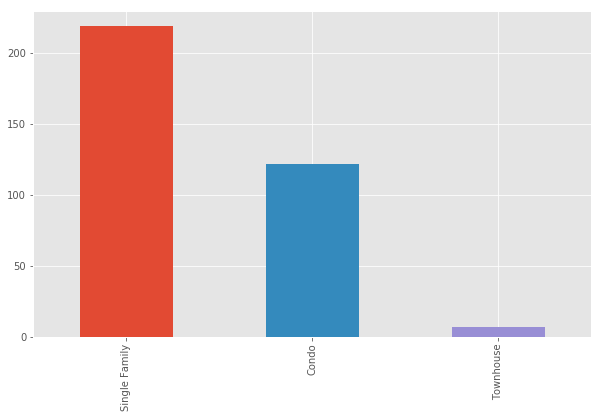

In [15]:
# bar chart of property type
train['PropType'].value_counts().plot(kind='bar')

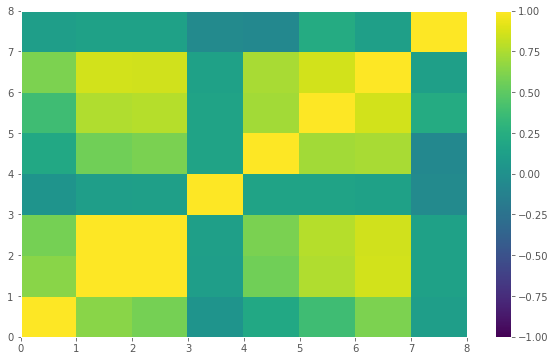

In [16]:
# calculate and visualize correlations as matrix
corr=train[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']].corr()
plt.pcolor(corr,vmax=1,vmin=-1)
plt.colorbar()
plt.show()

              Acres  LstPrice  SoldPrice     Taxes    TotBed    TotBth  \
Acres      1.000000  0.644551   0.580098  0.032042  0.202819  0.382756   
LstPrice   0.644551  1.000000   0.994010  0.116089  0.569090  0.763554   
SoldPrice  0.580098  0.994010   1.000000  0.120408  0.593968  0.778555   
Taxes      0.032042  0.116089   0.120408  1.000000  0.156491  0.163016   
TotBed     0.202819  0.569090   0.593968  0.156491  1.000000  0.721898   
TotBth     0.382756  0.763554   0.778555  0.163016  0.721898  1.000000   
TotSqf     0.606213  0.862507   0.858554  0.142953  0.741517  0.864617   
YearBlt    0.112563  0.146818   0.145944 -0.054098 -0.067677  0.221635   

             TotSqf   YearBlt  
Acres      0.606213  0.112563  
LstPrice   0.862507  0.146818  
SoldPrice  0.858554  0.145944  
Taxes      0.142953 -0.054098  
TotBed     0.741517 -0.067677  
TotBth     0.864617  0.221635  
TotSqf     1.000000  0.119410  
YearBlt    0.119410  1.000000  


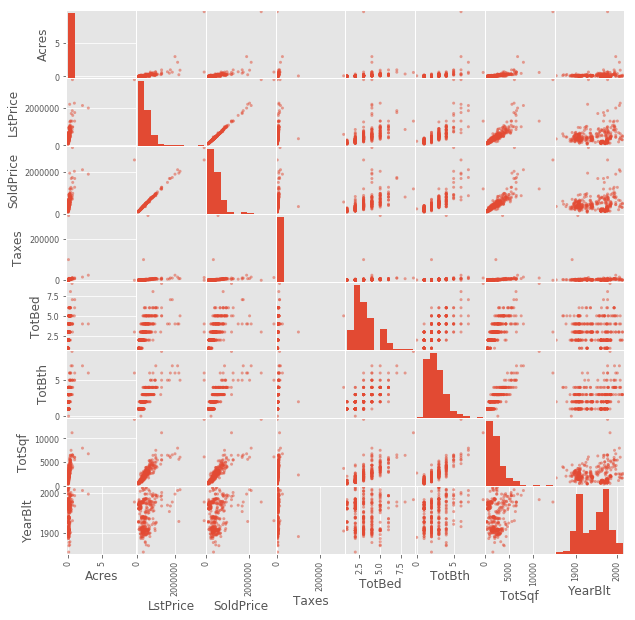

In [17]:
# scatter plot matrix
print (train[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']].corr())
pd.plotting.scatter_matrix(train[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']],figsize=(10,10))
plt.show()

**Your Interpretation:** TODO $$$$
From the scatter matrix we can see that there is a strong correlation between SoldPrice and LstPrice (because data form really closely to line x=y) while there is no correlation between (TotBed and YearBlt) and (TotBth and YearBlt) (data scattered randomly without any specific orientation). The rest shows weak correlations


### Task 4: Geospatial plot
Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of lat and long makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?

Bonus: If you can, overlay the scatterplot on a map of the city. (This is challenging, and we didn't teach you how to do it, so you might do the other parts of the assignment first.)

What can you say about the relation between the location and the house price?

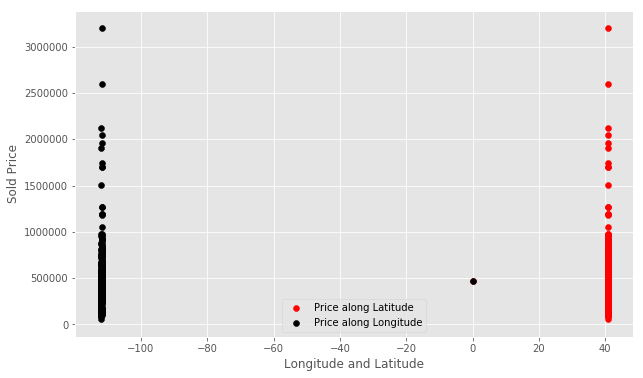

In [18]:
# your code goes here
plt.scatter(x=train['Latitude'],y=train['SoldPrice'],color='r',label='Price along Latitude')
plt.scatter(x=train['Longitude'],y=train['SoldPrice'],color='k',label='Price along Longitude')
plt.xlabel('Longitude and Latitude')
plt.ylabel('Sold Price')
plt.legend()
plt.show()

**Your Interpretation:** TODO
$$$$ Location of a house could not tell much about its price

### Task 5: Simple  Linear Regression 
Use the 'ols' function from the [statsmodels](http://www.statsmodels.org/stable/index.html) package to regress the Sold price on some of the other variables. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is one of the other variables. 

You'll find that the best predictor of sold price is the list price. Report the R-squared value for this model (SoldPrice ~ LstPrice) and give an interpretation for its meaning. Also give an interpretation of $\beta_1$ for this model. Make a plot of list price vs. sold price and overlay the prediction coming from your regression model. 

In [19]:
# Your code here
lrg_sl=sm.ols(formula='SoldPrice ~ LstPrice', data=train).fit()
lrg_sl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.862e+04
Date:                Sat, 16 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:48:07   Log-Likelihood:                -4185.1
No. Observations:                 348   AIC:                             8374.
Df Residuals:                     346   BIC:                             8382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.898e+04   3317.775      8.733      0.000    2.25e+04    3.55e+04
LstPrice       0.9019      0.005    169.185      0.000       0.891       0.912
==============================================================================
Omnibus:                      555.043   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233759.385
Skew:                          -8.301   Prob(JB):                         0.00
Kurtosis:                     128.880   Cond. No.                     9.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

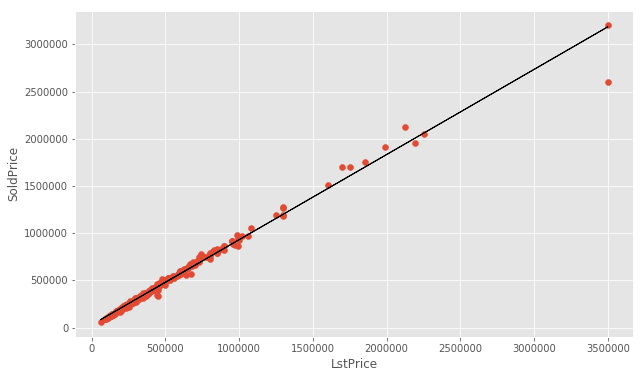

In [20]:
# plot 
plt.scatter(x=train['LstPrice'],y=train['SoldPrice'])
plt.plot(train['LstPrice'],lrg_sl.predict(),color='k',linewidth=1)
plt.xlabel('LstPrice')
plt.ylabel('SoldPrice')
plt.show()

**Your Interpretation:** TODO
$$$$ The R-squared value is 0.988 which means this model is quite decent to predict the SoldPrice from LstPrice alone. The coefficient $\beta_1$ is approximately 1, showing that the values of SoldPrice greatly depend on the values of LstPrice

### Task 6: Multilinear Regression 
Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Prop_Type. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots +  \beta_n x_n, 
$$
where $x_i$ are predictive variables. Which variables are the best predictors for the Sold Price? 

Specific questions:
1. Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.  
+ Estimate the value that each Garage space adds to a house. 
+ Does latitude or longitude have an impact on house price? Explain. 
+ If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

In [21]:
# your code goes here
pd.to_numeric(train['TotSqf'])
#Variables: Acres, Deck, GaragCap, Latitude, Longitude, Patio, PkgSpacs, Taxes, TotBed, TotBth, TotSqf, YearBlt
mlr=sm.ols(formula='SoldPrice ~ Acres + Deck + GaragCap + Latitude + Longitude + Patio + PkgSpacs + Taxes + TotBed + TotBth + YearBlt + TotSqf',data=train).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     97.32
Date:                Sat, 16 Feb 2019   Prob (F-statistic):          3.15e-101
Time:                        18:48:07   Log-Likelihood:                -4680.5
No. Observations:                 347   AIC:                             9387.
Df Residuals:                     334   BIC:                             9437.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.428e+06   6.81e+05      2.095      0.037    8.73e+04    2.77e+06
Acres       7.916e+04   2.51e+04      3.155      0.002    2.98e+04    1.29e+05
Deck       -3932.0502   1.28e+04     -0.307      0.759   -2.92e+04    2.13e+04
GaragCap    3.918e+04   1.43e+04      2.748      0.006    1.11e+04    6.72e+04
Latitude    8.434e+06    1.9e+06      4.445      0.000     4.7e+06    1.22e+07
Longitude   3.074e+06   6.92e+05      4.445      0.000    1.71e+06    4.43e+06
Patio       3198.9066   4810.770      0.665      0.507   -6264.321    1.27e+04
PkgSpacs   -1.638e+04   7010.996     -2.337      0.020   -3.02e+04   -2591.045
Taxes          0.3911      0.562      0.695      0.487      -0.715       1.497
TotBed     -3.012e+04   1.24e+04     -2.424      0.016   -5.46e+04   -5680.557
TotBth      7.063e+04   1.69e+04      4.185      0.000    3.74e+04    1.04e+05
YearBlt     -690.1675    331.845     -2.080      0.038   -1342.938     -37.397
TotSqf       106.6179     17.643      6.043      0.000      71.913     141.323
==============================================================================
Omnibus:                      407.299   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42896.081
Skew:                           5.034   Prob(JB):                         0.00
Kurtosis:                      56.531   Cond. No.                     3.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation:** TODO
$$$$ 1. No, the coefficient of TotSqf tells how the total area of a house can change its price. In this case, the larger the area, the higher the price.
$$$$ 2. 1 unit of GaragCap adds $3.918\cdot10^4$ unit to the price
$$$$ 3. Yes. The prices positvely vary along with Latitude and Longitude. The more West-North directed, the higher the price.
$$$$ 4. This model has a lower R-squared value than that of Sold~List model. Additionally, for certain variables such as Deck and Patio, the P-values are quite high, showing a irrelevant relationship with the SoldPrice, while their coefficients also quite high. Thus, this model is not sufficient to do a better job than the Sold~List model

In [22]:
hf=sm.ols(formula='SoldPrice ~ Acres + Latitude + Longitude + TotBth + LstPrice',data=train).fit()
hf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.343e+04
Date:                Sat, 16 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:48:07   Log-Likelihood:                -4035.8
No. Observations:                 348   AIC:                             8084.
Df Residuals:                     342   BIC:                             8107.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.041e+04   2.67e+04      0.765      0.445   -3.21e+04    7.29e+04
Acres      -6.425e+04   3388.325    -18.962      0.000   -7.09e+04   -5.76e+04
Latitude    1.383e+06   2.58e+05      5.357      0.000    8.75e+05    1.89e+06
Longitude    5.04e+05   9.41e+04      5.358      0.000    3.19e+05    6.89e+05
TotBth      4612.3373   1710.762      2.696      0.007    1247.397    7977.277
LstPrice       0.9340      0.007    132.296      0.000       0.920       0.948
==============================================================================
Omnibus:                      180.884   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5601.533
Skew:                           1.536   Prob(JB):                         0.00
Kurtosis:                      22.413   Cond. No.                     1.20e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 7: Incorporating a categorical variable

Above, we considered houses, townhouses, and condos together, but here we'll distinguish between them. Consider the two regression models: 
$$
\text{SoldPrice} = \beta_0 + \beta_1 \text{Prop_Type_num}
$$
and 
$$
\text{SoldPrice} = \beta_0  + \beta_1 \text{Prop_Type_num} + \beta_2 \text{TotSqf}
$$
From the first model, it would appear that Property type is significant in predicting the sold price. On the other hand, the second model indicates that when you take into account total square footage, property type is no longer predictive. Explain this. (Hint: there is a confounder lurking here.) Make a scatterplot of TotSqf vs. SoldPrice where the house types are colored differently to illustrate your explanation. 

In [23]:
# Your code goes here
dummy=pd.get_dummies(train['PropType'])
train=pd.concat([train,dummy],axis=1)

In [28]:
train.rename(columns={'Single Family':'SFam'}, inplace=True)
catonly=sm.ols(formula='TotSqf ~ Condo + Townhouse + SFam',data=train).fit()
catonly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TotSqf   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     78.00
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           1.13e-28
Time:                        18:54:56   Log-Likelihood:                -3013.4
No. Observations:                 348   AIC:                             6033.
Df Residuals:                     345   BIC:                             6044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1618.7255    138.116     11.720      0.000    1347.069    1890.382
Condo       -513.1600    164.664     -3.116      0.002    -837.032    -189.288
Townhouse    669.1316    398.960      1.677      0.094    -115.569    1453.832
SFam        1462.7539    153.473      9.531      0.000    1160.893    1764.615
==============================================================================
Omnibus:                      231.091   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3064.021
Skew:                           2.582   Prob(JB):                         0.00
Kurtosis:                      16.588   Cond. No.                     7.81e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
mix=sm.ols(formula='SoldPrice ~ Condo + Townhouse + SFam + TotSqf',data=train).fit()
mix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     322.0
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           1.70e-99
Time:                        18:48:07   Log-Likelihood:                -4722.8
No. Observations:                 348   AIC:                             9454.
Df Residuals:                     344   BIC:                             9469.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3654.9516   2.22e+04     -0.164      0.870   -4.74e+04    4.01e+04
Condo       1.252e+04   2.27e+04      0.551      0.582   -3.22e+04    5.72e+04
Townhouse  -1.486e+04   5.45e+04     -0.273      0.785   -1.22e+05    9.24e+04
SFam       -1316.4504   2.35e+04     -0.056      0.955   -4.75e+04    4.49e+04
TotSqf       191.1401      7.329     26.082      0.000     176.726     205.554
==============================================================================
Omnibus:                      351.308   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26200.124
Skew:                           3.973   Prob(JB):                         0.00
Kurtosis:                      44.759   Cond. No.                     4.63e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Your Interpretation:** TODO

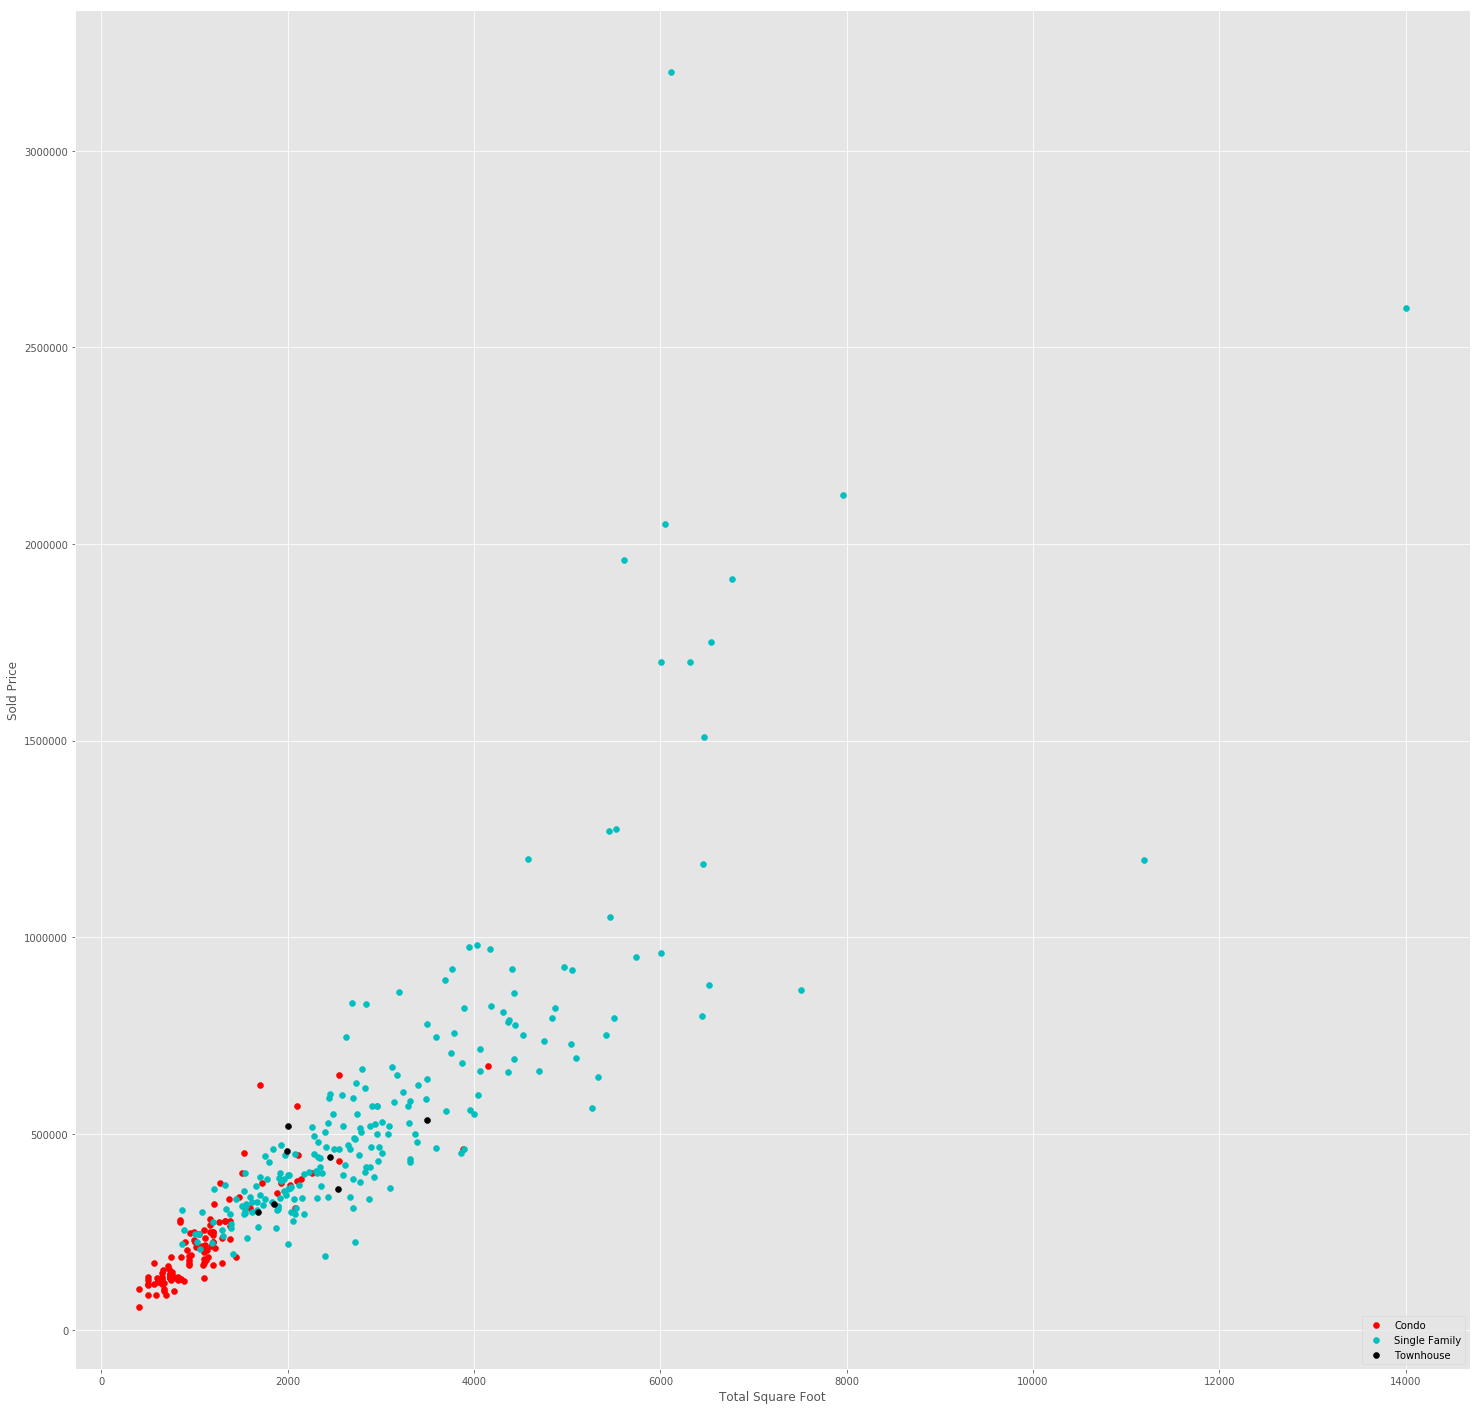

In [26]:
plt.figure(figsize=(25,25))
plt.scatter(x=train[train['Condo']>0]['TotSqf'],y=train[train['Condo']>0]['SoldPrice'],color='r',label='Condo')
plt.scatter(x=train[train['SFam']>0]['TotSqf'],y=train[train['SFam']>0]['SoldPrice'],color='c',label='Single Family')
plt.scatter(x=train[train['Townhouse']>0]['TotSqf'],y=train[train['Townhouse']>0]['SoldPrice'],color='k',label='Townhouse')
plt.legend(numpoints=1,loc=4)
plt.xlabel('Total Square Foot')
plt.ylabel('Sold Price')
plt.show()